# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Fetching image from: https://picsum.photos/800/600?image=1084
Original RGB image shape: (600, 800, 3)


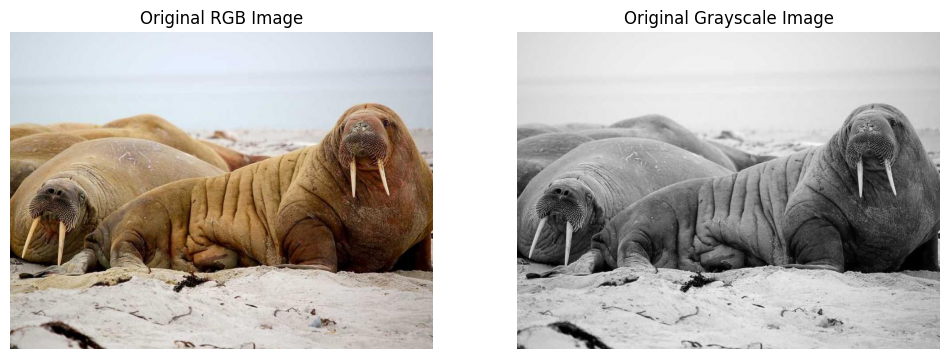

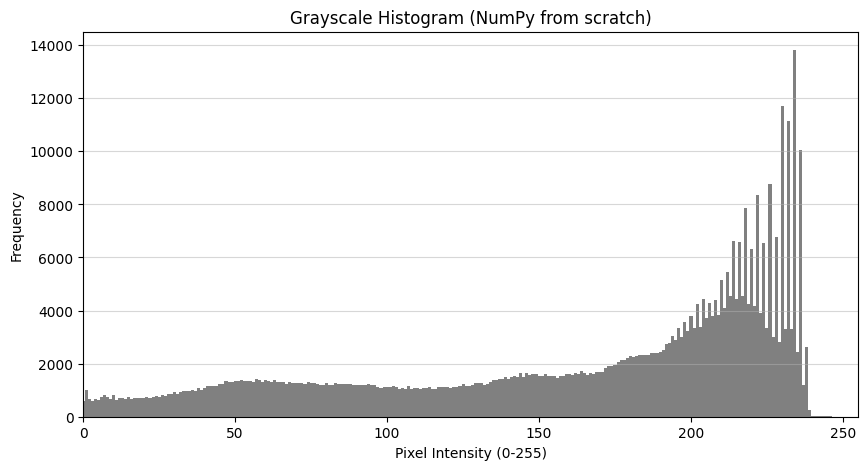

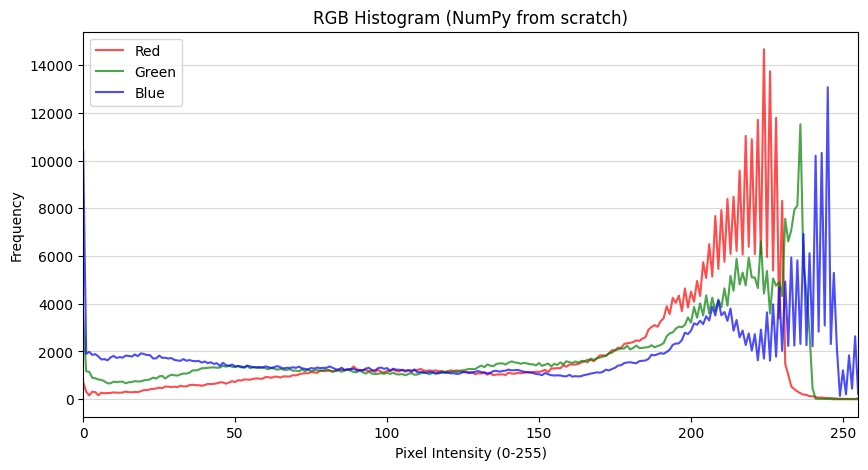

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO
from PIL import Image

# Image URL (using picsum.photos)
image_url = "https://picsum.photos/800/600?image=1084"
print(f"Fetching image from: {image_url}")

try:
    # Fetch the image data
    response = requests.get(image_url)
    response.raise_for_status() # Check for bad status codes

    # Open the image using PIL
    img_pil = Image.open(BytesIO(response.content)).convert('RGB')

    # Converting PIL image to a NumPy array (0-255 RGB)
    img_rgb_original = np.array(img_pil)
    # Creating the grayscale version
    img_gray_original = cv2.cvtColor(img_rgb_original, cv2.COLOR_RGB2GRAY)
    print(f"Original RGB image shape: {img_rgb_original.shape}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img_rgb_original)
    axes[0].set_title('Original RGB Image')
    axes[0].axis('off')

    axes[1].imshow(img_gray_original, cmap='gray')
    axes[1].set_title('Original Grayscale Image')
    axes[1].axis('off')
    plt.show()

except Exception as e:
    print(f"An error occurred during image loading: {e}")
    # Create dummy arrays to allow the code to run, though it won't be useful
    img_rgb_original = np.zeros((100, 100, 3), dtype=np.uint8)
    img_gray_original = np.zeros((100, 100), dtype=np.uint8)

# Making the grey histogram for the image
def gray_histogram(gray_img: np.ndarray) -> np.ndarray:
    # Initialize a histogram array of size 256 with zeros
    hist = np.zeros(256, dtype=int)

    # Ensure the input is a 2D array (grayscale)
    if gray_img.ndim != 2:
        raise ValueError("Input image must be a 2D grayscale image.")

    # Iterating over the image pixels and counting the frequency of each intensity
    for pixel_value in np.nditer(gray_img):
        # TypeCasting to standard int for indexing
        intensity = int(pixel_value)
        # Incrementing the count for the corresponding intensity bin
        hist[intensity] += 1
    return hist

# Calculate and Plot Grayscale Histogram
gray_hist = gray_histogram(img_gray_original)

plt.figure(figsize=(10, 5))
plt.title('Grayscale Histogram (NumPy from scratch)')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
# Use np.arange(256) for the x-axis bins
plt.bar(np.arange(256), gray_hist, width=1.0, color='gray')
plt.xlim([0, 255])
plt.grid(axis='y', alpha=0.5)
plt.show()

def rgb_histogram(rgb_img: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:

    if rgb_img.ndim != 3 or rgb_img.shape[-1] != 3:
        raise ValueError("Input image must be a 3D RGB image.")

    # Spliting the channels: R=0, G=1, B=2
    R_channel = rgb_img[:, :, 0]
    G_channel = rgb_img[:, :, 1]
    B_channel = rgb_img[:, :, 2]

    # Reusing the gray_histogram function for each channel
    hist_r = gray_histogram(R_channel)
    hist_g = gray_histogram(G_channel)
    hist_b = gray_histogram(B_channel)

    return hist_r, hist_g, hist_b

# Calculate and Plot RGB Histogram
hist_r, hist_g, hist_b = rgb_histogram(img_rgb_original)

plt.figure(figsize=(10, 5))
plt.title('RGB Histogram (NumPy from scratch)')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')

# Plot the histograms
bins = np.arange(256)
plt.plot(bins, hist_r, color='red', label='Red', alpha=0.7)
plt.plot(bins, hist_g, color='green', label='Green', alpha=0.7)
plt.plot(bins, hist_b, color='blue', label='Blue', alpha=0.7)

plt.xlim([0, 255])
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2065542545.py:6: SyntaxWarning: invalid escape sequence '\m'
  S = {V - \min(R, G, B)}/{V} if V!=0    S=0 if V=0



Average absolute difference between original and reconverted RGB: 0.2431
Test passed: RGB to HSV and back successful (visually identical).


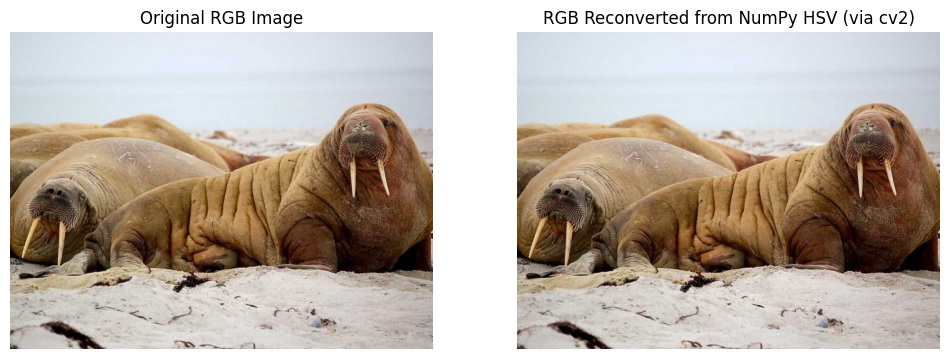

In [ ]:
def rgb_to_hsv(img_rgb: np.ndarray) -> np.ndarray:

    """
RGB to HSV Formulas (from 0-1 normalized values):Let R, G, B be normalized to [0, 1].
V = max(R, G, B)
S = {V - \min(R, G, B)}/{V} if V!=0    S=0 if V=0
H = \begin{cases} 0 & \text{if } S = 0 \\ 60 \times \frac{G - B}{V - \min} & \text{if } V = R \\ 60 \times (\frac{B - R}{V - \min} + 2) & \text{if } V = G \\ 60 \times (\frac{R - G}{V - \min} + 4) & \text{if } V = B \end{cases}$$If $
H < 0, then H = H + 360
    """
  #  Converts a 0-255 RGB image to a non-normalized HSV image (OpenCV-compatible format)
    # 1. Normalize RGB to [0, 1] (using float type for calculations)
    rgb_float = img_rgb.astype(np.float32) / 255.0

    # Separating channels(R=0,G=1,B=2)
    R, G, B = rgb_float[:, :, 0], rgb_float[:, :, 1], rgb_float[:, :, 2]

    # Initialize HSV channels
    H = np.zeros_like(R)
    S = np.zeros_like(R)
    V = np.zeros_like(R)

    # Calculate Max and Min (V is Max)
    V = np.maximum.reduce([R, G, B])  # V is max(R,G,B)
    min_rgb = np.minimum.reduce([R, G, B])

    # Difference (used for S and H calculation)
    delta = V - min_rgb

    # 2. S calculation
    # Only calculate S where V is not zero (to avoid division by zero)
    # Using a mask for conditional assignment instead of loop because of better efficiency
    mask_v_nonzero = V != 0
    S[mask_v_nonzero] = delta[mask_v_nonzero] / V[mask_v_nonzero]
    # S is already 0 where V=0 (due to initialization and mask)

    # 3. Hue (H) calculation
    # Using a mask to avoid division by zero (delta=0 means S=0, H=0)
    mask_delta_nonzero = delta != 0

    # Mask for R == V
    mask_r_max = np.logical_and(R == V, mask_delta_nonzero)
    H[mask_r_max] = 60 * ((G[mask_r_max] - B[mask_r_max]) / delta[mask_r_max])

    # Mask for G == V
    mask_g_max = np.logical_and(G == V, mask_delta_nonzero)
    H[mask_g_max] = 60 * (((B[mask_g_max] - R[mask_g_max]) / delta[mask_g_max]) + 2)

    # Mask for B == V
    mask_b_max = np.logical_and(B == V, mask_delta_nonzero)
    H[mask_b_max] = 60 * (((R[mask_b_max] - G[mask_b_max]) / delta[mask_b_max]) + 4)

    # Case for negative Hue values (H < 0, then H = H + 360)
    H[H < 0] += 360

    # 4. Scaling and Finalization for OpenCV compatibility
    # H: [0, 360] -> [0, 179] (OpenCV uses 2x factor)
    # S: [0, 1] -> [0, 255]
    # V: [0, 1] -> [0, 255]

    H_scaled = (H / 2.0).astype(np.uint8)  # Hue scaling
    S_scaled = (S * 255.0).astype(np.uint8)
    V_scaled = (V * 255.0).astype(np.uint8)

    # Stack the channels back together
    hsv_img = np.stack((H_scaled, S_scaled, V_scaled), axis=2)

    return hsv_img  #HSV image returned

# --- Test and Display Part B ---

# 1. Converting RGB to HSV using the custom NumPy function
hsv_output = rgb_to_hsv(img_rgb_original)

# 2. Converting custom HSV output back to RGB using cv2 (for verification)
rgb_reconverted = cv2.cvtColor(hsv_output, cv2.COLOR_HSV2RGB)

# Displaying results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb_original)
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

axes[1].imshow(rgb_reconverted)
axes[1].set_title('RGB Reconverted from NumPy HSV (via cv2)')
axes[1].axis('off')

# Verification check
# Mathematically, there might be slight differences due to float precision and uint8 casting but more or less images should be identical.
# This check confirms the data types and scaling are correct.
diff = np.mean(np.abs(img_rgb_original.astype(np.float32) - rgb_reconverted.astype(np.float32)))
print(f"\nAverage absolute difference between original and reconverted RGB: {diff:.4f}")
if diff < 1.0:
    print("Test passed: RGB to HSV and back successful (visually identical).")
else:
    print("Test caution: A difference was detected. Check scaling and types.")

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

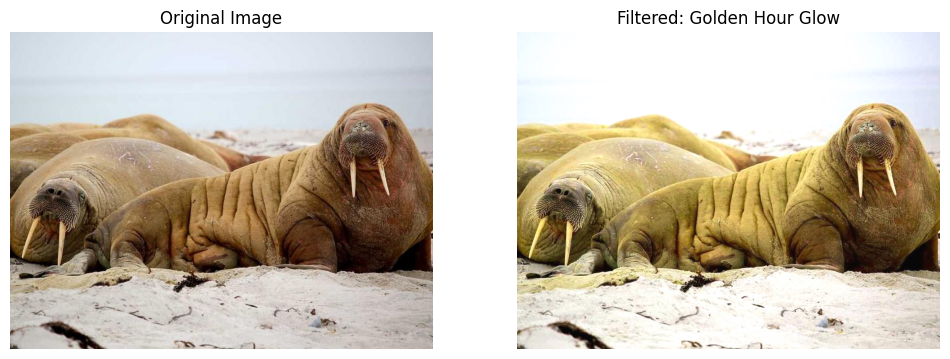


**Filter Note: Golden Hour Glow**
Chosen Modifications: Contrast Adjustment (1.15 alpha) and Hue/Vibrance Boost.
Suitability: I chose these modifications to mimic the natural, warm light of a sunset (golden hour). The hue shift creates warmth, while the contrast and vibrance boost make the colors 'pop,' ideal for dramatic landscapes.


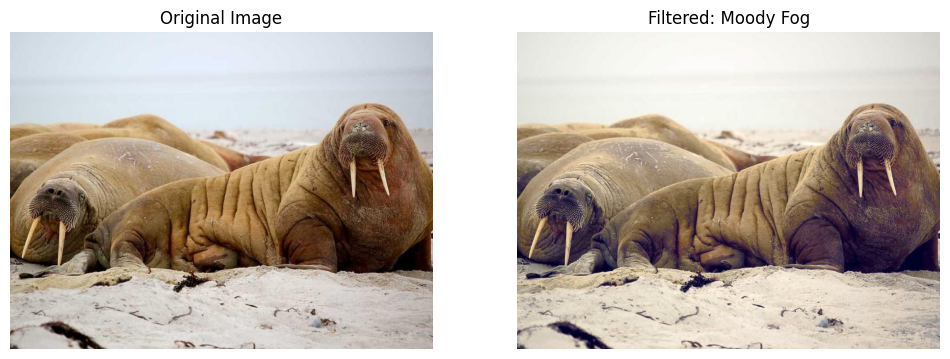


**Filter Note: Moody Fog**
Chosen Modifications: Channel Mixing (Desaturation) and Custom Color Tint (Split-Toning).
Suitability: The desaturation mutes the image, and the blue tint in the shadows (split-toning) adds a cold, 'foggy' atmospheric effect. This is good for reducing the visual noise of overly colorful scenes and creating a somber, cinematic mood.


In [ ]:
# The two filter I have created is
# A-Glow filter-:Boosts warmth (Hue/Saturation shift) and applies a slight gamma correction/contrast boost for a dramatic, sunset feel.
# Good for landscapes and portraits.Code for this is given below
def glow(img_rgb: np.ndarray) -> np.ndarray:
    # Converting to float for processing
    img_float = img_rgb.astype(np.float32) / 255.0

    # 1. Contrast Adjustment (Alpha-Beta correction)
    # R' = alpha * R + beta
    alpha = 1.15  # Contrast boost
    beta = 0.03   # Slight brightness shift
    img_contrast = np.clip(img_float * alpha + beta, 0, 1)

    # 2. Convert to HSV for Saturation/Hue modification
    # Using cv2 for HSV conversion as allowed in this part (Numpy implementation would be complex)
    img_hsv = cv2.cvtColor((img_contrast * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    H, S, V = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]

    # 3. Hue Rotation
    hue_shift = 5  # Shift Hue towards orange/yellow (0-179 range)
    H = (H + hue_shift) % 180

    # 4. Vibrance Boost
    # Boost saturation, but more for dull pixels
    sat_boost = 1.2 # Overall saturation boost
    # Create a simple mask: low saturation pixels will get more boost
    mask = S < 128
    S[mask] = np.clip(S[mask] * sat_boost, 0, 255)
    S[~mask] = np.clip(S[~mask] * 1.05, 0, 255) # Only a slight boost for highly saturated pixels

    # Re-stack and converting it back to RGB
    img_hsv_filtered = np.stack((H, S, V), axis=2)
    img_filtered_rgb = cv2.cvtColor(img_hsv_filtered, cv2.COLOR_HSV2RGB)

    return img_filtered_rgb

# --- Test and Display Golden Hour Glow Filter ---
img_golden = golden_hour_glow(img_rgb_original)

# Note: The original image is a landscape,thus suitable for this filter.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_original)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_golden)
plt.title("Filtered: Golden Hour Glow")
plt.axis('off')
plt.show()

print("\n**Filter Note: Golden Hour Glow**")
print("Chosen Modifications: Contrast Adjustment (1.15 alpha) and Hue/Vibrance Boost.")
print("Suitability: I chose these modifications to mimic the natural, warm light of a sunset (golden hour). The hue shift creates warmth, while the contrast and vibrance boost make the colors 'pop,' ideal for dramatic landscapes.")

#B   grey filter-
# Saturation Change (Desaturation): Overall saturation reduction for a muted feel.
# Split-Toning (Custom Color Tint): Apply a blue tint to shadows and a yellow tint to highlights.
def grey(img_rgb: np.ndarray) -> np.ndarray:
    # Convert to float for processing
    img_float = img_rgb.astype(np.float32) / 255.0

    # 1. Overall Desaturation (Channel Mixing on R, G, B)
    # Simple desaturation by mixing channels towards gray (weighted average)
    R, G, B = img_float[:, :, 0], img_float[:, :, 1], img_float[:, :, 2]
    # Calculate weighted grayscale luminance
    L = 0.299 * R + 0.587 * G + 0.114 * B

    # Desaturate: New_Channel = old_Channel * mix_factor + Luminance * (1 - mix_factor)
    mix_factor = 0.75 # 0.75 keeps 75% of the original color, 25% is desaturated
    R = R * mix_factor + L * (1 - mix_factor)
    G = G * mix_factor + L * (1 - mix_factor)
    B = B * mix_factor + L * (1 - mix_factor)

    img_desat = np.stack((R, G, B), axis=2)

    # 2. Split-Toning and Blue Layer/Tint
    # Finding highlights and shadows using the luminance L (0-1)
    # Shadows (L < 0.3): Apply a cool blue/cyan tint
    shadow_mask = L < 0.3
    shadow_tint_b_boost = 0.15
    B[shadow_mask] = np.clip(B[shadow_mask] + shadow_tint_b_boost, 0, 1)

    # Highlights (L > 0.7): Applying a warm yellow tint
    highlight_mask = L > 0.7
    highlight_tint_r_boost = 0.08
    highlight_tint_g_boost = 0.05
    R[highlight_mask] = np.clip(R[highlight_mask] + highlight_tint_r_boost, 0, 1)
    G[highlight_mask] = np.clip(G[highlight_mask] + highlight_tint_g_boost, 0, 1)

    # Final image (clip and convert back to uint8)
    img_filtered = np.stack((R, G, B), axis=2)
    img_filtered_rgb = np.clip(img_filtered * 255.0, 0, 255).astype(np.uint8)

    return img_filtered_rgb

# Test and Display Moody Fog Filter
img_moody = moody_fog(img_rgb_original)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_original)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_moody)
plt.title("Filtered: Moody Fog")
plt.axis('off')
plt.show()

print("\n**Filter Note: Moody Fog**")
print("Chosen Modifications: Channel Mixing (Desaturation) and Custom Color Tint (Split-Toning).")
print("Suitability: The desaturation mutes the image, and the blue tint in the shadows (split-toning) adds a cold, 'foggy' atmospheric effect. This is good for reducing the visual noise of overly colorful scenes and creating a somber, cinematic mood.")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Max Channel Values (R, G, B): [255. 252. 255.]
Overall Max (M): 255.0
Scaling Factors (R, G, B): [1.     1.0119 1.    ]


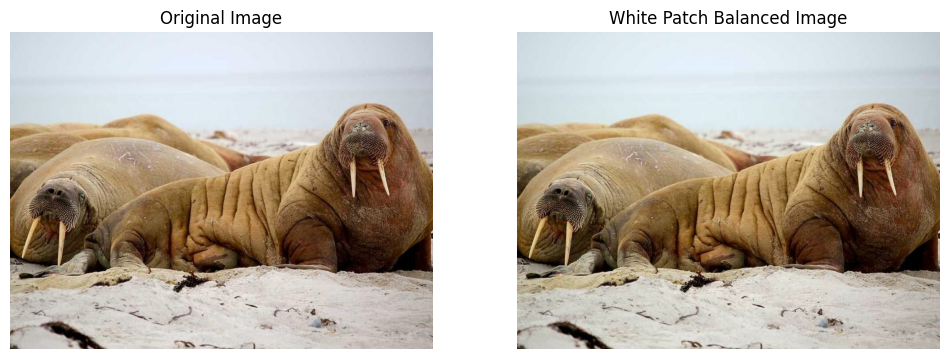

In [ ]:
"""
The White Patch method (also known as Max-RGB or Scale-by-Max) assumes that the brightest pixel in the scene must be a white (or gray) object,
 and thus its channels should be equal. It calculates a scaling factor for each channel based on the maximum value found
"""
#  Formulaes
# Let R_{max}, G_{max}, B_{max}$ be the maximum values in each channel of the image.
#Let M =max(R_{max}, G_{max}, B_{max}).
"""
R_{factor} = M/R_{max} G_{factor} =M/G_{max} B_{factor} = M/B_{max}
New channels are: R_{new} = R_{old}*R_{factor}, G_{new} = G_{old}*G_{factor}, B_{new} = B_{old}* B_{factor}
"""
def white_patch_balance(img_rgb: np.ndarray) -> np.ndarray:
    #Applies White Patch Method for white balance correction using NumPy.

    # Converting to float for accurate calculation
    img_float = img_rgb.astype(np.float32)

    # 1. Finding the max value for each channel (R_max, G_max, B_max)
    max_values = img_float.max(axis=(0, 1))

    R_max, G_max, B_max = max_values[0], max_values[1], max_values[2]

    # 2. Finding the overall maximum (M)
    M = np.max(max_values)

    # 3. Calculating the scaling factors. Use a small epsilon to avoid division by zero
    # for an image with a completely black channel (R_max=0).
    epsilon = 1e-5
    R_factor = M / (R_max + epsilon)
    G_factor = M / (G_max + epsilon)
    B_factor = M / (B_max + epsilon)

    # Create the factor array
    factors = np.array([R_factor, G_factor, B_factor])

    print(f"Max Channel Values (R, G, B): {max_values}")
    print(f"Overall Max (M): {M}")
    print(f"Scaling Factors (R, G, B): {factors.round(4)}")

    # 4. Apply the factors to the entire image array
    img_balanced_float = img_float * factors

    # 5. Clip and convert back to 0-255 uint8
    img_balanced_rgb = np.clip(img_balanced_float, 0, 255).astype(np.uint8)

    return img_balanced_rgb

#Test and Display Part D
img_balanced = white_patch_balance(img_rgb_original)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_original)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_balanced)
plt.title("White Patch Balanced Image")
plt.axis('off')
plt.show()



## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.